Project 3:- JohnsHopkinsCovid19

Business Case:-

To predict number of death and recovery cases for Covid 19

Domain Analysis:- 

1.Province/State(Province),Country/Region(Country):-Remove these two features, Because each (Province,State,Country,Region) identified uniquely by (Latitude, Longitude). 

2.Lat(Latitude), Long(Longitude):-Converting problem into regression one based on "Cases".

3.Status:-It shows the type(Confirmed, Death, Recovered).

4.Date:-The variable is converted to numeric values, starting at 1 and increasing by one unit per day.

5.Count:-It shows count of the type.


Importing Libraries:-

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

%matplotlib inline
import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

Loading Data:-

Imported the path of various files where we will be retrieving the data so this data from Johns Hopkins University

In [ ]:
Confirmed_filepath = ("time_series_covid19_confirmed_global.csv")
Death_filepath = ("time_series_covid19_deaths_global.csv")
Recovered_filepath = ("time_series_covid19_recovered_global.csv")

We imported that file using read.csv and we renamed the colums from Province/State to province and Country/Region to Country and we place inplace is equal to True so changes will be in our data

In [ ]:
def Import_COVIDData(filepath):
    data = filepath
    data = pd.read_csv(data)
    data.rename(columns={'Province/State':'Province','Country/Region':'Country'},inplace = True)
    return data

Here we performe the transformation on data by using melt we transform the columns to rows.

In [ ]:
def transform_COVIDData(data):
    data = pd.melt(
    frame = data,
    id_vars = ['Province','Country','Lat','Long','Status'],
    var_name = 'Date',
    value_name = 'Count'
    )
    return data

Exploratory Data Analysis:-

Confirmed cases across globe

In [ ]:
ConfirmedCases = Import_COVIDData(Confirmed_filepath)

In [ ]:
ConfirmedCases

,Province,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15491,15834,16153,16534,16844,17306,17606,17989,18313,18476,18802,19213,19678,20155,20677,21251,21668,22204,22729,23281,23875,24471,25142,25575,26127,26779,27363,27919,28664,29256,29906,30574,31362,32250,33006,33843,34401,35003,35686,36151
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1847,1858,1858,1869,1882,1889,1892,1899,1906,1907,1911,1916,1924,1930,1933,1943,1946,1953,1958,1962,1976,1979,1983,1983,1987,1989,1994,1999,2003,2007,2009,2011,2013,2016,2019,2022,2024,2026,2026,2028
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8663,9021,9186,9343,9839,9981,10218,10372,10627,10831,11082,11148,11285,11376,11601,11779,11902,12025,12097,12381,12415,12523,12639,12709,12776,12836,12952,13112,13214,13323,13466,13539,13720,13819,13887,13928,14022,14070,14131,14175


Then we are looking the confirmed cases, the above confirmed cases table will be converted like shown in below. The new column count will be added provinc, country, lat, long, status these are fixed and remaining will transform into date. All dates will be present in one column like date and the values will be added in the count column. The count will shows the confirmed, death and recovered cases.

In [ ]:
ConfirmedCases['Status'] = 'Confirmed'
ConfirmedCases = transform_COVIDData(ConfirmedCases)

In [ ]:
ConfirmedCases

,Province,Country,Lat,Long,Status,Date,Count
0,NaN,Afghanistan,33.939110,67.709953,Confirmed,1/22/20,0
1,NaN,Albania,41.153300,20.168300,Confirmed,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,Confirmed,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,Confirmed,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,Confirmed,1/22/20,0
...,...,...,...,...,...,...,...
64899,NaN,West Bank and Gaza,31.952200,35.233200,Confirmed,9/21/20,36151
64900,NaN,Western Sahara,24.215500,-12.885800,Confirmed,9/21/20,10
64901,NaN,Yemen,15.552727,48.516388,Confirmed,9/21/20,2028
64902,NaN,Zambia,-13.133897,27.849332,Confirmed,9/21/20,14175


Recovered cases across globe

In [ ]:
RecoveredCases = Import_COVIDData(Recovered_filepath)
RecoveredCases['Status'] ='Recovered'
RecoveredCases = transform_COVIDData(RecoveredCases)

In [ ]:
RecoveredCases

,Province,Country,Lat,Long,Status,Date,Count
0,NaN,Afghanistan,33.939110,67.709953,Recovered,1/22/20,0
1,NaN,Albania,41.153300,20.168300,Recovered,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,Recovered,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,Recovered,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,Recovered,1/22/20,0
...,...,...,...,...,...,...,...
61727,NaN,West Bank and Gaza,31.952200,35.233200,Recovered,9/21/20,24428
61728,NaN,Western Sahara,24.215500,-12.885800,Recovered,9/21/20,8
61729,NaN,Yemen,15.552727,48.516388,Recovered,9/21/20,1235
61730,NaN,Zambia,-13.133897,27.849332,Recovered,9/21/20,13629


Death cases across globe



In [ ]:
DeathCases = Import_COVIDData(Death_filepath)
DeathCases['Status'] = 'Death'
DeathCases = transform_COVIDData(DeathCases)

In [ ]:
DeathCases

,Province,Country,Lat,Long,Status,Date,Count
0,NaN,Afghanistan,33.939110,67.709953,Death,1/22/20,0
1,NaN,Albania,41.153300,20.168300,Death,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,Death,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,Death,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,Death,1/22/20,0
...,...,...,...,...,...,...,...
64899,NaN,West Bank and Gaza,31.952200,35.233200,Death,9/21/20,265
64900,NaN,Western Sahara,24.215500,-12.885800,Death,9/21/20,1
64901,NaN,Yemen,15.552727,48.516388,Death,9/21/20,586
64902,NaN,Zambia,-13.133897,27.849332,Death,9/21/20,331


Total cases across globe

In [ ]:
Totaldata = pd.concat([ConfirmedCases,DeathCases,RecoveredCases])

In [ ]:
Totaldata.dtypes

Province     object
Country      object
Lat         float64
Long        float64
Status       object
Date         object
Count         int64
dtype: object

In [ ]:
Totaldata

,Province,Country,Lat,Long,Status,Date,Count
0,NaN,Afghanistan,33.939110,67.709953,Confirmed,1/22/20,0
1,NaN,Albania,41.153300,20.168300,Confirmed,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,Confirmed,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,Confirmed,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,Confirmed,1/22/20,0
...,...,...,...,...,...,...,...
61727,NaN,West Bank and Gaza,31.952200,35.233200,Recovered,9/21/20,24428
61728,NaN,Western Sahara,24.215500,-12.885800,Recovered,9/21/20,8
61729,NaN,Yemen,15.552727,48.516388,Recovered,9/21/20,1235
61730,NaN,Zambia,-13.133897,27.849332,Recovered,9/21/20,13629


The Date column in object formate so we placed it an index as proper date formate for analyzing the data based on date.

In [ ]:
Totaldata['Date'] = pd.to_datetime(Totaldata['Date'])
Totaldata.set_index('Date',inplace=True)

In [ ]:
Totaldata

,Province,Country,Lat,Long,Status,Count
Date,,,,,,
2020-01-22,NaN,Afghanistan,33.939110,67.709953,Confirmed,0
2020-01-22,NaN,Albania,41.153300,20.168300,Confirmed,0
2020-01-22,NaN,Algeria,28.033900,1.659600,Confirmed,0
2020-01-22,NaN,Andorra,42.506300,1.521800,Confirmed,0
2020-01-22,NaN,Angola,-11.202700,17.873900,Confirmed,0
...,...,...,...,...,...,...
2020-09-21,NaN,West Bank and Gaza,31.952200,35.233200,Recovered,24428
2020-09-21,NaN,Western Sahara,24.215500,-12.885800,Recovered,8
2020-09-21,NaN,Yemen,15.552727,48.516388,Recovered,1235


Top 10 countries with COVID cases

In [ ]:
def Cases_Top10Countries(Status):
    Top10Countries = Totaldata[(Totaldata['Status']==Status) & (Totaldata.index==max(Totaldata[Totaldata['Status']==Status].index))].sort_values(by='Count',ascending = False).head(10)[['Country','Count']]
    return Top10Countries

In [ ]:
Top10CountriesRecovered = Cases_Top10Countries('Recovered')
Top10CountriesConfirmed = Cases_Top10Countries('Confirmed')
Top10CountriesDeath = Cases_Top10Countries('Death')

In [ ]:
def Display_Top10Country(Top10Countries,Status):
    Top10Countries = Top10Countries.reset_index()
    Top10Countries = Top10Countries[['Country','Count']]
    date = max(Totaldata[Totaldata['Status']==Status].index)
    date = date.date()
    print(Status +' cases till:',date)
    return Top10Countries

In [ ]:
Top10CountriesConfirmed = Display_Top10Country(Top10CountriesConfirmed,'Confirmed')
Top10CountriesConfirmed.style.background_gradient(cmap = 'Blues')
                                                  

Confirmed cases till: 2020-09-21


,Country,Count
0,US,6856884
1,India,5487580
2,Brazil,4558040
3,Russia,1105048
4,Colombia,770435
5,Peru,768895
6,Mexico,700580
7,Spain,671468
8,South Africa,661936
9,Argentina,640147


In [ ]:
Top10CountriesRecovered = Display_Top10Country(Top10CountriesRecovered,'Recovered')
Top10CountriesRecovered.style.background_gradient(cmap = 'Greens')

Recovered cases till: 2020-09-21


,Country,Count
0,India,4396399
1,Brazil,3993432
2,US,2615949
3,Russia,909026
4,Colombia,640900
5,Peru,607837
6,Mexico,596317
7,South Africa,591208
8,Argentina,508563
9,Chile,421111


In [ ]:
Top10CountriesDealth = Display_Top10Country(Top10CountriesDeath,'Death')
Top10CountriesDealth.style.background_gradient(cmap = 'Reds')
                                                  

Death cases till: 2020-09-21


,Country,Count
0,US,199865
1,Brazil,137272
2,India,87882
3,Mexico,73697
4,United Kingdom,41788
5,Italy,35724
6,Peru,31369
7,France,31174
8,Spain,30663
9,Iran,24478


In [ ]:
date = max(Totaldata[Totaldata['Status']=='Confirmed'].index)
date = date.date()
px.bar(Top10CountriesConfirmed,x='Country', y='Count', color='Country', title='Top 10 Confirmed cases till '+str(date))

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1)

fig.add_trace(
    go.Bar(x=Top10CountriesRecovered['Country'],y=Top10CountriesRecovered['Count'],text = Top10CountriesRecovered['Count'],name='Recovered'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=Top10CountriesConfirmed['Country'],y=Top10CountriesConfirmed['Count'],text = Top10CountriesConfirmed['Count'],name='Confirmed'),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x=Top10CountriesDeath['Country'],y=Top10CountriesDeath['Count'],text = Top10CountriesDeath['Count'],name='Death'),
    row=3, col=1
)

fig.update_layout(height=1400, width=800, title_text="Top 10 Countires as of"+str(date))
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
fig.show()

In [ ]:
Totaldata

,Province,Country,Lat,Long,Status,Count
Date,,,,,,
2020-01-22,NaN,Afghanistan,33.939110,67.709953,Confirmed,0
2020-01-22,NaN,Albania,41.153300,20.168300,Confirmed,0
2020-01-22,NaN,Algeria,28.033900,1.659600,Confirmed,0
2020-01-22,NaN,Andorra,42.506300,1.521800,Confirmed,0
2020-01-22,NaN,Angola,-11.202700,17.873900,Confirmed,0
...,...,...,...,...,...,...
2020-09-21,NaN,West Bank and Gaza,31.952200,35.233200,Recovered,24428
2020-09-21,NaN,Western Sahara,24.215500,-12.885800,Recovered,8
2020-09-21,NaN,Yemen,15.552727,48.516388,Recovered,1235


In [ ]:
Totaldata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 191540 entries, 2020-01-22 to 2020-09-21
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Province  55876 non-null   object 
 1   Country   191540 non-null  object 
 2   Lat       191540 non-null  float64
 3   Long      191540 non-null  float64
 4   Status    191540 non-null  object 
 5   Count     191540 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 10.2+ MB


In [ ]:
Totaldata['Province'] = Totaldata['Province'].fillna('N/A')
Totaldata

,Province,Country,Lat,Long,Status,Count
Date,,,,,,
2020-01-22,N/A,Afghanistan,33.939110,67.709953,Confirmed,0
2020-01-22,N/A,Albania,41.153300,20.168300,Confirmed,0
2020-01-22,N/A,Algeria,28.033900,1.659600,Confirmed,0
2020-01-22,N/A,Andorra,42.506300,1.521800,Confirmed,0
2020-01-22,N/A,Angola,-11.202700,17.873900,Confirmed,0
...,...,...,...,...,...,...
2020-09-21,N/A,West Bank and Gaza,31.952200,35.233200,Recovered,24428
2020-09-21,N/A,Western Sahara,24.215500,-12.885800,Recovered,8
2020-09-21,N/A,Yemen,15.552727,48.516388,Recovered,1235


In [ ]:
Totaldata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 191540 entries, 2020-01-22 to 2020-09-21
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Province  191540 non-null  object 
 1   Country   191540 non-null  object 
 2   Lat       191540 non-null  float64
 3   Long      191540 non-null  float64
 4   Status    191540 non-null  object 
 5   Count     191540 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 10.2+ MB


In [ ]:
Totaldata.head()

,Province,Country,Lat,Long,Status,Count
Date,,,,,,
2020-01-22,N/A,Afghanistan,33.93911,67.709953,Confirmed,0
2020-01-22,N/A,Albania,41.15330,20.168300,Confirmed,0
2020-01-22,N/A,Algeria,28.03390,1.659600,Confirmed,0
2020-01-22,N/A,Andorra,42.50630,1.521800,Confirmed,0
2020-01-22,N/A,Angola,-11.20270,17.873900,Confirmed,0


In [ ]:
Totaldata.tail()

,Province,Country,Lat,Long,Status,Count
Date,,,,,,
2020-09-21,N/A,West Bank and Gaza,31.952200,35.233200,Recovered,24428
2020-09-21,N/A,Western Sahara,24.215500,-12.885800,Recovered,8
2020-09-21,N/A,Yemen,15.552727,48.516388,Recovered,1235
2020-09-21,N/A,Zambia,-13.133897,27.849332,Recovered,13629
2020-09-21,N/A,Zimbabwe,-19.015438,29.154857,Recovered,5924


Here we are using pivot for transforming the single rows into columns.

In [ ]:
import numpy as np
tranformeddata = pd.pivot_table(
            Totaldata,
            index = [Totaldata.index,'Province','Country','Lat','Long'],
            columns = 'Status',
            values = 'Count',
            )

In [ ]:
tranformeddata.head()

Status                                                                     Confirmed  ...  Recovered
Date       Province                     Country        Lat      Long                  ...           
2020-01-22 Alberta                      Canada          53.9333 -116.5765        0.0  ...        NaN
           Anguilla                     United Kingdom  18.2206 -63.0686         0.0  ...        0.0
           Anhui                        China           31.8257  117.2264        1.0  ...        0.0
           Aruba                        Netherlands     12.5211 -69.9683         0.0  ...        0.0
           Australian Capital Territory Australia      -35.4735  149.0124        0.0  ...        0.0

[5 rows x 3 columns]

The Status row converted into column. The count column will show the all the cases count values.

In [ ]:
tranformeddata['Recovered'] = tranformeddata['Recovered'].fillna(0)
tranformeddata['Confirmed'] = tranformeddata['Confirmed'].fillna(0)
tranformeddata['Death'] = tranformeddata['Death'].fillna(0)

In [ ]:
tranformeddata = tranformeddata.reset_index()
tranformeddata.head()

Status,Date,Province,Country,Lat,Long,Confirmed,Death,Recovered
0,2020-01-22,Alberta,Canada,53.9333,-116.5765,0.0,0.0,0.0
1,2020-01-22,Anguilla,United Kingdom,18.2206,-63.0686,0.0,0.0,0.0
2,2020-01-22,Anhui,China,31.8257,117.2264,1.0,0.0,0.0
3,2020-01-22,Aruba,Netherlands,12.5211,-69.9683,0.0,0.0,0.0
4,2020-01-22,Australian Capital Territory,Australia,-35.4735,149.0124,0.0,0.0,0.0


In [ ]:
tranformeddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       66368 non-null  datetime64[ns]
 1   Province   66368 non-null  object        
 2   Country    66368 non-null  object        
 3   Lat        66368 non-null  float64       
 4   Long       66368 non-null  float64       
 5   Confirmed  66368 non-null  float64       
 6   Death      66368 non-null  float64       
 7   Recovered  66368 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 4.1+ MB


In [ ]:
tranformeddata[tranformeddata['Country'] == 'India']

Status,Date,Province,Country,Lat,Long,Confirmed,Death,Recovered
125,2020-01-22,N/A,India,20.593684,78.96288,0.0,0.0,0.0
397,2020-01-23,N/A,India,20.593684,78.96288,0.0,0.0,0.0
669,2020-01-24,N/A,India,20.593684,78.96288,0.0,0.0,0.0
941,2020-01-25,N/A,India,20.593684,78.96288,0.0,0.0,0.0
1213,2020-01-26,N/A,India,20.593684,78.96288,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
65133,2020-09-17,N/A,India,20.593684,78.96288,5214677.0,84372.0,4112551.0
65405,2020-09-18,N/A,India,20.593684,78.96288,5308014.0,85619.0,4208431.0
65677,2020-09-19,N/A,India,20.593684,78.96288,5400619.0,86752.0,4303043.0
65949,2020-09-20,N/A,India,20.593684,78.96288,5487580.0,87882.0,4396399.0


In [ ]:
Confirmed = tranformeddata.groupby("Date").sum()['Confirmed'].reset_index()
Death = tranformeddata.groupby("Date").sum()['Death'].reset_index()
Recovered = tranformeddata.groupby("Date").sum()['Recovered'].reset_index()

In [ ]:
Confirmed

,Date,Confirmed
0,2020-01-22,555.0
1,2020-01-23,654.0
2,2020-01-24,941.0
3,2020-01-25,1434.0
4,2020-01-26,2118.0
...,...,...
239,2020-09-17,30175313.0
240,2020-09-18,30499534.0
241,2020-09-19,30780755.0
242,2020-09-20,31021972.0


In [ ]:
Recovered

,Date,Recovered
0,2020-01-22,28.0
1,2020-01-23,30.0
2,2020-01-24,36.0
3,2020-01-25,39.0
4,2020-01-26,52.0
...,...,...
239,2020-09-17,20527185.0
240,2020-09-18,20778990.0
241,2020-09-19,21016801.0
242,2020-09-20,21252815.0


In [ ]:
Death

,Date,Death
0,2020-01-22,17.0
1,2020-01-23,18.0
2,2020-01-24,26.0
3,2020-01-25,42.0
4,2020-01-26,56.0
...,...,...
239,2020-09-17,946061.0
240,2020-09-18,951767.0
241,2020-09-19,956999.0
242,2020-09-20,960695.0


Visualization:-

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = Confirmed['Date'],y=Confirmed['Confirmed'],mode = 'lines+markers',name = 'Confirmed',line = dict(color = 'blue')))
fig.add_trace(go.Scatter(x = Death['Date'],y=Death['Death'],mode = 'lines+markers',name = 'Death',line = dict(color = 'Red')))
fig.add_trace(go.Scatter(x = Recovered['Date'],y=Recovered['Recovered'],mode = 'lines+markers',name = 'Recovered',line = dict(color = 'green')))
fig.update_layout(coloraxis = dict(colorscale = 'Bluered_r'),showlegend = True, title_text = "Worldwide Cases")


Forcasting Using FbProphet:-

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from fbprophet import Prophet

In [ ]:
Confirmed = tranformeddata.groupby("Date").sum()['Confirmed'].reset_index()
Death = tranformeddata.groupby("Date").sum()['Death'].reset_index()
Recovered = tranformeddata.groupby("Date").sum()['Recovered'].reset_index()


Confirmed:-

In [ ]:
Confirmed

,Date,Confirmed
0,2020-01-22,555.0
1,2020-01-23,654.0
2,2020-01-24,941.0
3,2020-01-25,1434.0
4,2020-01-26,2118.0
...,...,...
239,2020-09-17,30175313.0
240,2020-09-18,30499534.0
241,2020-09-19,30780755.0
242,2020-09-20,31021972.0


In [ ]:
Confirmed.columns = ["ds", "y"]
Confirmed["ds"] = pd.to_datetime(Confirmed["ds"])

In [ ]:
Confirmed.tail()

,ds,y
239,2020-09-17,30175313.0
240,2020-09-18,30499534.0
241,2020-09-19,30780755.0
242,2020-09-20,31021972.0
243,2020-09-21,31245797.0


In [ ]:
# creating future dates of 100 days
model = Prophet()
model.fit(Confirmed)
future = model.make_future_dataframe(periods=100)
future.tail()
# it is taking weekly seasonality

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
339,2020-12-26
340,2020-12-27
341,2020-12-28
342,2020-12-29
343,2020-12-30


In [ ]:
forecast = model.predict(future)

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9226.407466,-72360.434972,29001.106590,-9226.407466,-9226.407466,-9666.733846,-9666.733846,-9666.733846,-9666.733846,-9666.733846,-9666.733846,0.0,0.0,0.0,-18893.141312
1,2020-01-23,-6422.257080,-55040.324818,45406.968332,-6422.257080,-6422.257080,1242.053611,1242.053611,1242.053611,1242.053611,1242.053611,1242.053611,0.0,0.0,0.0,-5180.203470
2,2020-01-24,-3618.106695,-38883.539239,64451.641650,-3618.106695,-3618.106695,15486.951735,15486.951735,15486.951735,15486.951735,15486.951735,15486.951735,0.0,0.0,0.0,11868.845040
3,2020-01-25,-813.956309,-33883.961165,66154.322869,-813.956309,-813.956309,18223.908267,18223.908267,18223.908267,18223.908267,18223.908267,18223.908267,0.0,0.0,0.0,17409.951958
4,2020-01-26,1990.194076,-46310.807697,55368.292485,1990.194076,1990.194076,3862.349627,3862.349627,3862.349627,3862.349627,3862.349627,3862.349627,0.0,0.0,0.0,5852.543704


In [ ]:
forecast[["ds","yhat","yhat_lower", "yhat_upper"]].tail()


,ds,yhat,yhat_lower,yhat_upper
339,2020-12-26,5.629706e+07,5.309356e+07,5.962243e+07
340,2020-12-27,5.654498e+07,5.332491e+07,5.992694e+07
341,2020-12-28,5.679242e+07,5.351784e+07,6.022923e+07
342,2020-12-29,5.704752e+07,5.373253e+07,6.051439e+07
343,2020-12-30,5.731830e+07,5.395944e+07,6.085684e+07


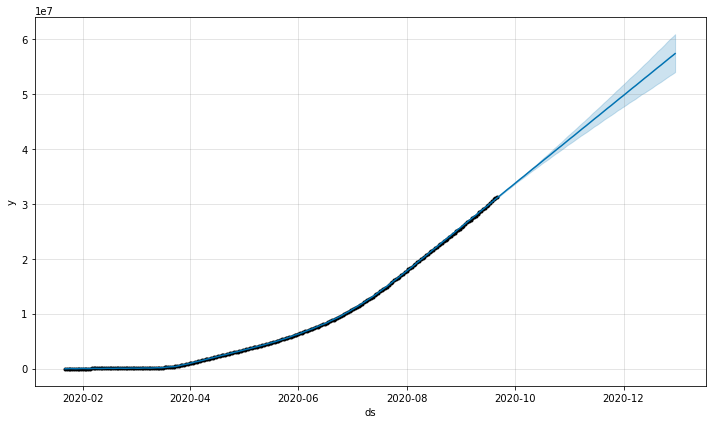

In [ ]:
# plot the predicted projection
Confirmed_forecast_plot = model.plot(forecast)

In this the douted point is real data, the blue is projection and the light blue space is trend space. And what you all see after the blue dout that is all future prediction.

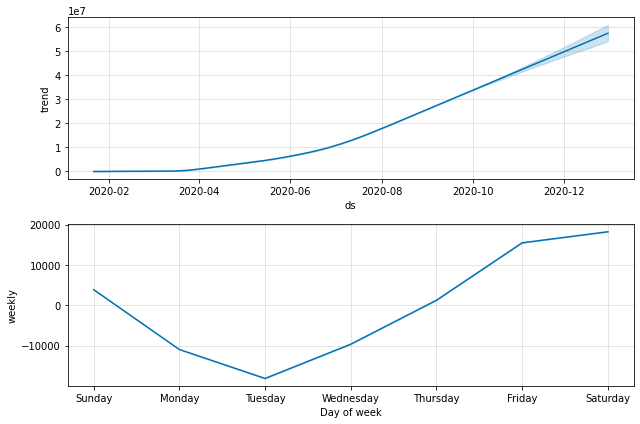

In [ ]:
# visualize each components[Trends, monthly and weekly]
confirmed_forecast_plot = model.plot_components(forecast)

Hyper Parameter Tunning:-

In [ ]:
from fbprophet.diagnostics import cross_validation
tranformeddata = cross_validation(model, initial='130days', period='22days', horizon = '44days')
tranformeddata.head()

INFO:fbprophet:Making 4 forecasts with cutoffs between 2020-06-03 00:00:00 and 2020-08-08 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-06-04,6.520685e+06,6.490703e+06,6.547269e+06,6649014.0,2020-06-03
1,2020-06-05,6.621914e+06,6.593451e+06,6.648557e+06,6779972.0,2020-06-03
2,2020-06-06,6.721270e+06,6.692491e+06,6.750186e+06,6915760.0,2020-06-03
3,2020-06-07,6.815960e+06,6.784659e+06,6.846122e+06,7027674.0,2020-06-03
4,2020-06-08,6.909077e+06,6.875649e+06,6.943994e+06,7130092.0,2020-06-03


In [ ]:
from fbprophet.diagnostics import performance_metrics
tranformeddata_p = performance_metrics(tranformeddata)
tranformeddata_p.head()


,horizon,mse,rmse,mae,mape,mdape,coverage
0,5 days,1.425395e+11,377544.102879,352452.243485,0.028655,0.030600,0.0
1,6 days,1.832350e+11,428059.620748,398255.916651,0.031856,0.033782,0.0
2,7 days,2.345143e+11,484266.755223,449051.597581,0.035320,0.036717,0.0
3,8 days,2.959919e+11,544051.393171,503568.906362,0.039084,0.040603,0.0
4,9 days,3.574957e+11,597909.450394,554246.629794,0.042657,0.045995,0.0


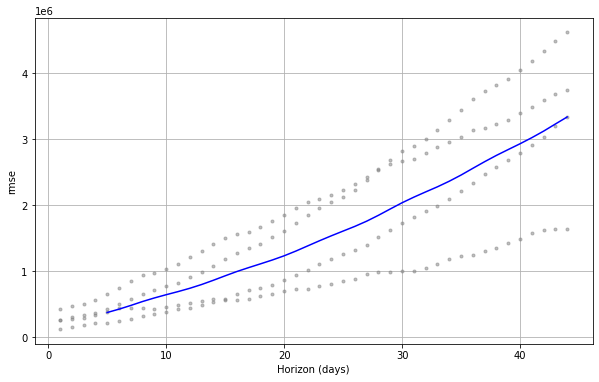

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(tranformeddata, metric='rmse')

Recovered:

In [ ]:
Recovered.columns = ["ds", "y"]
Recovered["ds"] = pd.to_datetime(Recovered["ds"])

In [ ]:
Recovered

,ds,y
0,2020-01-22,28.0
1,2020-01-23,30.0
2,2020-01-24,36.0
3,2020-01-25,39.0
4,2020-01-26,52.0
...,...,...
239,2020-09-17,20527185.0
240,2020-09-18,20778990.0
241,2020-09-19,21016801.0
242,2020-09-20,21252815.0


In [ ]:
Recovered.tail()

,ds,y
239,2020-09-17,20527185.0
240,2020-09-18,20778990.0
241,2020-09-19,21016801.0
242,2020-09-20,21252815.0
243,2020-09-21,21394593.0


In [ ]:
model = Prophet()
model.fit(Recovered)
future = model.make_future_dataframe(periods=100)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
339,2020-12-26
340,2020-12-27
341,2020-12-28
342,2020-12-29
343,2020-12-30


In [ ]:
forecast = model.predict(future)
forecast[["ds","yhat","yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
339,2020-12-26,4.191604e+07,3.930365e+07,4.447068e+07
340,2020-12-27,4.211827e+07,3.947231e+07,4.472312e+07
341,2020-12-28,4.232674e+07,3.962382e+07,4.495997e+07
342,2020-12-29,4.254433e+07,3.981800e+07,4.522848e+07
343,2020-12-30,4.276473e+07,3.998773e+07,4.550064e+07


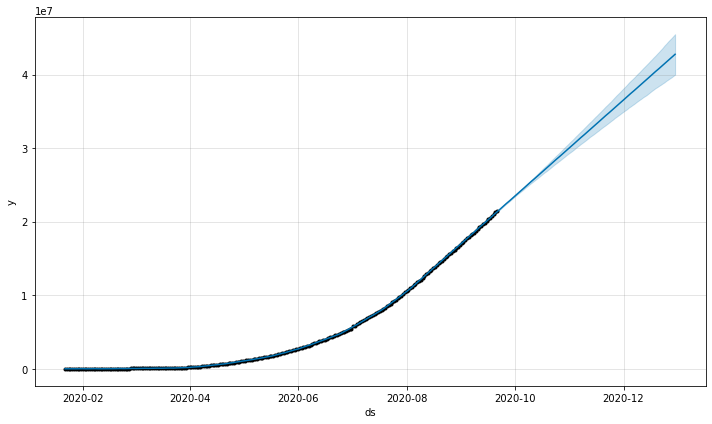

In [ ]:
recovered_forecast_plot = model.plot(forecast)


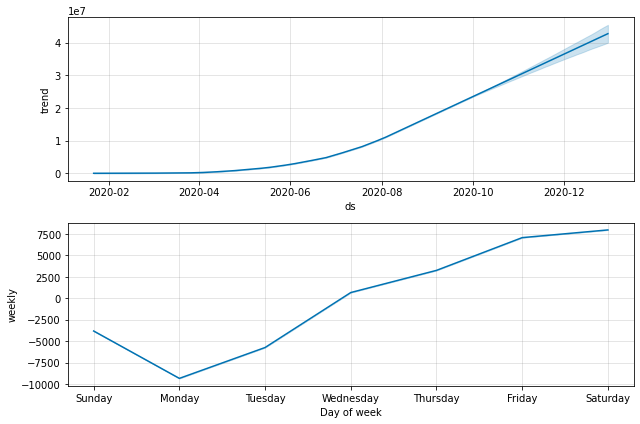

In [ ]:
Recovered_forecast_plot = model.plot_components(forecast)

Hyper Parameter Tunning:-

In [ ]:
from fbprophet.diagnostics import cross_validation
tranformeddata = cross_validation(model, initial='130days', period='22days', horizon = '44days')
tranformeddata.head()


INFO:fbprophet:Making 4 forecasts with cutoffs between 2020-06-03 00:00:00 and 2020-08-08 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-06-04,2.817927e+06,2.785185e+06,2.848821e+06,2945385.0,2020-06-03
1,2020-06-05,2.877853e+06,2.849296e+06,2.907903e+06,3014544.0,2020-06-03
2,2020-06-06,2.935235e+06,2.903398e+06,2.965926e+06,3086748.0,2020-06-03
3,2020-06-07,2.990241e+06,2.959880e+06,3.021764e+06,3141849.0,2020-06-03
4,2020-06-08,3.045754e+06,3.013751e+06,3.076358e+06,3293412.0,2020-06-03


In [ ]:
from fbprophet.diagnostics import performance_metrics
tranformeddata_p = performance_metrics(tranformeddata)
tranformeddata_p.head()


,horizon,mse,rmse,mae,mape,mdape,coverage
0,5 days,1.031240e+11,321129.214137,287896.226561,0.040944,0.038369,0.0
1,6 days,1.359463e+11,368708.950308,331354.554257,0.046257,0.043322,0.0
2,7 days,1.775146e+11,421324.793889,384981.999537,0.053395,0.049085,0.0
3,8 days,2.302531e+11,479846.966676,444904.532961,0.061325,0.055760,0.0
4,9 days,2.917714e+11,540158.707668,507222.456247,0.068875,0.073823,0.0


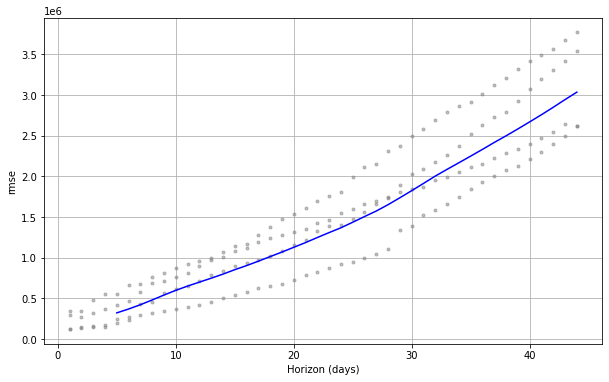

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(tranformeddata, metric='rmse')

Death:-

In [ ]:
Death.columns = ["ds", "y"]
Death["ds"] = pd.to_datetime(Death["ds"])

In [ ]:
Death

,ds,y
0,2020-01-22,17.0
1,2020-01-23,18.0
2,2020-01-24,26.0
3,2020-01-25,42.0
4,2020-01-26,56.0
...,...,...
239,2020-09-17,946061.0
240,2020-09-18,951767.0
241,2020-09-19,956999.0
242,2020-09-20,960695.0


In [ ]:
Death.tail()

,ds,y
239,2020-09-17,946061.0
240,2020-09-18,951767.0
241,2020-09-19,956999.0
242,2020-09-20,960695.0
243,2020-09-21,963693.0


In [ ]:
model = Prophet()
model.fit(Death)
future = model.make_future_dataframe(periods=100)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
339,2020-12-26
340,2020-12-27
341,2020-12-28
342,2020-12-29
343,2020-12-30


In [ ]:
forecast = model.predict(future)
forecast[["ds","yhat","yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
339,2020-12-26,1.510312e+06,1.369150e+06,1.660188e+06
340,2020-12-27,1.514885e+06,1.373099e+06,1.665773e+06
341,2020-12-28,1.519830e+06,1.376576e+06,1.673786e+06
342,2020-12-29,1.526146e+06,1.379999e+06,1.683033e+06
343,2020-12-30,1.532297e+06,1.384212e+06,1.692033e+06


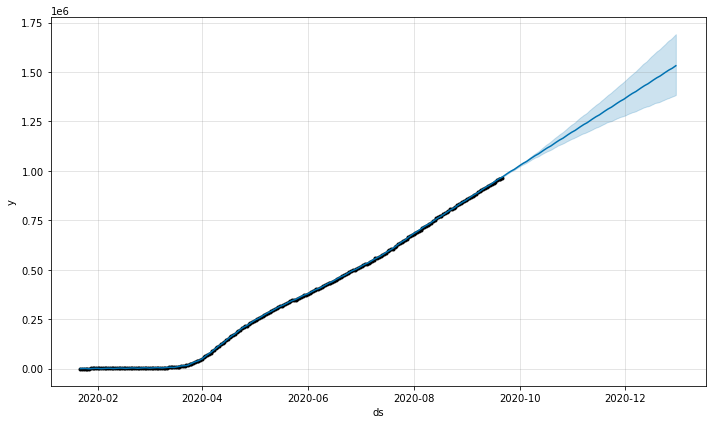

In [ ]:
Death_forecast_plot = model.plot(forecast)

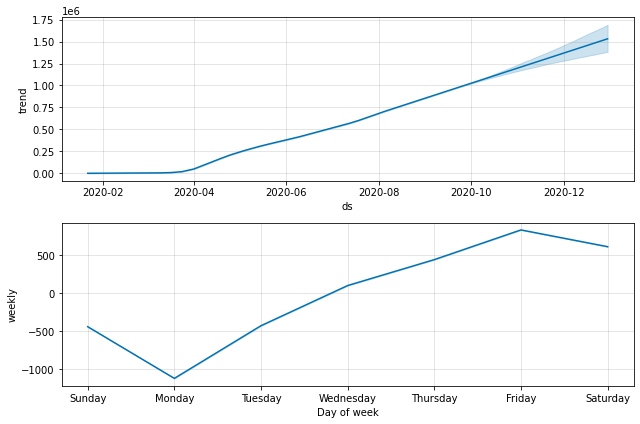

In [ ]:
Death_forecast_plot = model.plot_components(forecast)

Hyper Parameter Tunning:-

From 2020-01-22 to 2020-06-03 it takes as atraining data set and from 2020-06-04 it will be testing data set.

In [ ]:
from fbprophet.diagnostics import cross_validation
tranformeddata = cross_validation(model, initial='130days', period='22days', horizon = '44days')
tranformeddata.head()


INFO:fbprophet:Making 4 forecasts with cutoffs between 2020-06-03 00:00:00 and 2020-08-08 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-06-04,393262.449992,392235.051236,394344.626483,392879.0,2020-06-03
1,2020-06-05,397829.337126,396712.732478,398807.973907,397453.0,2020-06-03
2,2020-06-06,401948.993236,400717.183933,403168.987883,401265.0,2020-06-03
3,2020-06-07,405516.029915,404172.404409,406870.784230,404006.0,2020-06-03
4,2020-06-08,409208.228280,407740.037405,410763.800833,407707.0,2020-06-03


y is actual value and yhat is prediction. yhat prediction value is very close to y actual value. So we conclue that our prediction is correct.

In [ ]:
from fbprophet.diagnostics import performance_metrics
tranformeddata_p = performance_metrics(tranformeddata)
tranformeddata_p.head()


,horizon,mse,rmse,mae,mape,mdape,coverage
0,5 days,1.774728e+07,4212.751762,3640.988921,0.005988,0.005666,0.132353
1,6 days,3.092497e+07,5561.022051,4477.991956,0.007209,0.006676,0.132353
2,7 days,4.561680e+07,6754.020994,5355.234612,0.008468,0.005528,0.132353
3,8 days,6.119565e+07,7822.765108,6190.506601,0.009627,0.006170,0.176471
4,9 days,7.417643e+07,8612.574121,6869.758092,0.010556,0.006368,0.235294


The performance metric comapares y and yhat values and then it provides the mse, rmse, mae, mape, mdape, and coverage will be difference between yhat lower and yhat upper.

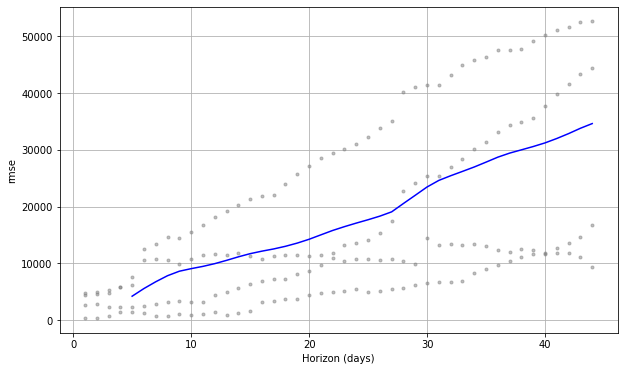

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(tranformeddata, metric='rmse')